In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
dataframe=pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries_data.csv')
print(dataframe.columns)
print(dataframe.shape)
dataframe.head()

Index(['Company', 'File No.', 'Opened', 'Closed', 'Coverage', 'SubCoverage',
       'Reason', 'SubReason', 'Disposition', 'Conclusion', 'Recovery',
       'Status'],
      dtype='object')
(38267, 12)


,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


In [3]:
print(dataframe.shape)
dataframe.dropna(inplace=True)

(38267, 12)


In [4]:
companies=dataframe['Company'].unique()
print(f"{dataframe.shape} after dropping null values")
print(type(companies))
print(len(companies))
for i in companies:
     print(i)

(9191, 12) after dropping null values
<class 'numpy.ndarray'>
350
Anthem Health Plans, Inc
UnitedHealthcare Insurance Company
Western World Insurance Company
Continental Casualty Company
Citizens Insurance Company of America
Transamerica Casualty Insurance Company
Century-National Insurance Company
Progressive Direct Insurance Company
Allstate Insurance Company
Cigna Health and Life Insurance Company
American General Life Insurance Company
Lincoln Benefit Life Company
GEICO General Insurance Company
Omaha Health Insurance Company
ConnectiCare Insurance Company, Inc
Transamerica Life Insurance Company
ConnectiCare Benefits, Inc.
American Imaging Management, Inc.
Transamerica Financial Life Insurance Company
SAFECO Insurance Company of Illinois
CSAA Affinity Insurance Company
State Farm Fire & Casualty Company
Aetna Health and Life Insurance Company
Farmers Group Property and Casualty Insurance Company
Hartford Casualty Insurance Company
Empower Annuity Insurance Company
Genworth Life In

In [5]:
resolved_companies=dataframe["Company"][dataframe["Conclusion"]=="Claim Paid"]
resolved_companies.head(30)

2                     Anthem Health Plans, Inc
6                     Anthem Health Plans, Inc
41                    Anthem Health Plans, Inc
48                    Anthem Health Plans, Inc
61     Transamerica Casualty Insurance Company
91     Transamerica Casualty Insurance Company
100    Transamerica Casualty Insurance Company
118                   Anthem Health Plans, Inc
125    Transamerica Casualty Insurance Company
160    Transamerica Casualty Insurance Company
184    Cigna Health and Life Insurance Company
185    Cigna Health and Life Insurance Company
187    Transamerica Casualty Insurance Company
188    Cigna Health and Life Insurance Company
191    Cigna Health and Life Insurance Company
197    Cigna Health and Life Insurance Company
198    Cigna Health and Life Insurance Company
199    Cigna Health and Life Insurance Company
201    Cigna Health and Life Insurance Company
204    Cigna Health and Life Insurance Company
205    Cigna Health and Life Insurance Company
206    Cigna 

In [6]:
highest=dataframe['Company'].value_counts().sort_values(ascending=False)
print("-"*10)
largest_no=highest[highest>400].sort_values(ascending=False)
print(largest_no)
mid_range=highest[(highest<=400)&(highest>=50)].sort_values(ascending=False)
print("-"*10)
lowest_no=highest[highest<50].sort_values(ascending=False)
print("-"*10)
print(lowest_no)
print("-"*10)

----------
Company
Anthem Health Plans, Inc                   2188
ConnectiCare Benefits, Inc.                 764
Cigna Health and Life Insurance Company     578
UnitedHealthcare Insurance Company          557
ConnectiCare Insurance Company, Inc         440
Name: count, dtype: int64
----------
----------
Company
American General Life Insurance Company                  49
Liberty Mutual Personal Insurance Company                49
GEICO Indemnity Company                                  46
USAA Casualty Insurance Company                          45
Allstate Insurance Company                               45
                                                         ..
Security Benefit Life Insurance Company                   1
Equitable Financial Life Insurance Company of America     1
Mid-Century Insurance Company                             1
New York Marine and General Insurance Company             1
Aegis Security Insurance Company                          1
Name: count, Length: 325,

<Axes: ylabel='count'>

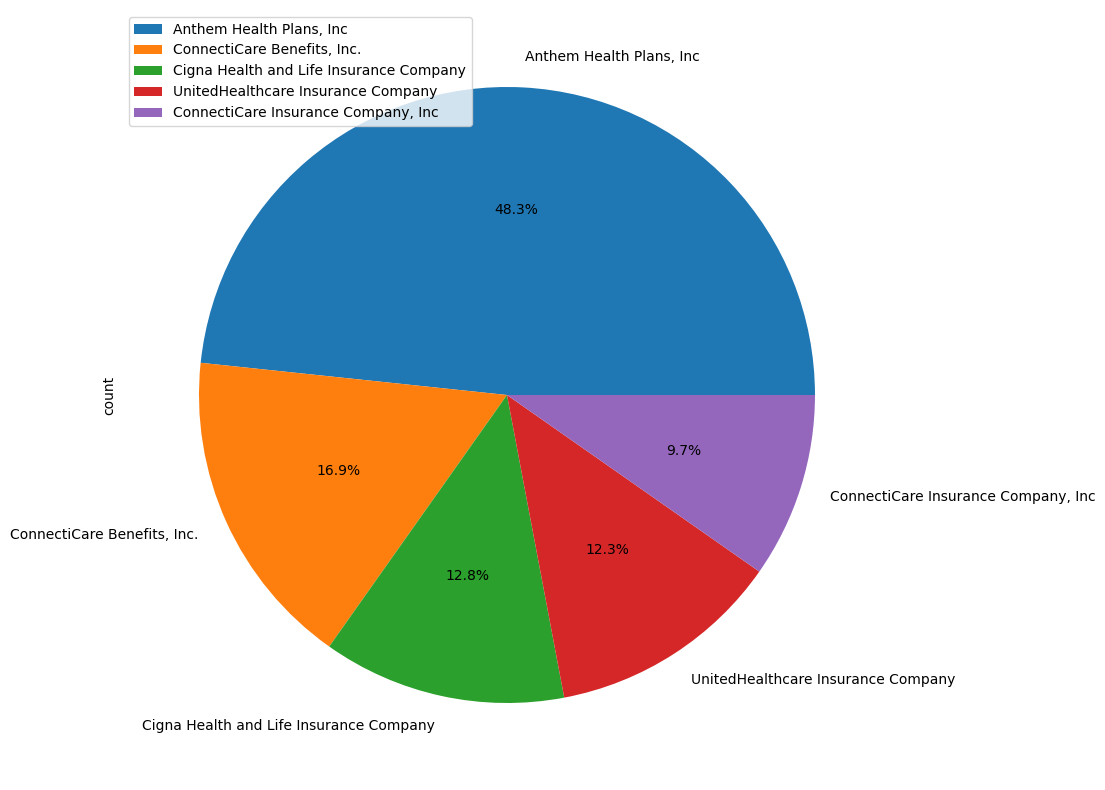

In [7]:
largest_no.plot(kind='pie',figsize=(20,10),legend=True,autopct='%1.1F%%')

In [8]:
largest_no.shape

(5,)

In [9]:
reasons=dataframe[dataframe['Company']=="Anthem Health Plans, Inc"] 
print(reasons[["Reason","SubReason","Disposition","Conclusion"]])

                  Reason                 SubReason  \
0         Claim Handling       Medically Necessary   
1         Claim Handling   Provider Contract Issue   
2         Claim Handling                    Denial   
3         Claim Handling   Provider Contract Issue   
4      Marketing & Sales        Duplicate Coverage   
...                  ...                       ...   
38042     Claim Handling   Eligibility of Provider   
38102     Claim Handling  Medical Necessity Denial   
38103     Claim Handling              Claim Denial   
38194     Claim Handling               Claim Delay   
38199     Claim Handling              Claim Denial   

                                           Disposition  \
0                       Company Position Substantiated   
1                                        Claim Settled   
2                                        Claim Settled   
3                                        Claim Settled   
4                    Compromised Settlement/Resolution   
...

In [10]:
opened_case=reasons[reasons['Status']=="Open"]
print(opened_case)

Empty DataFrame
Columns: [Company, File No., Opened, Closed, Coverage, SubCoverage, Reason, SubReason, Disposition, Conclusion, Recovery, Status]
Index: []


In [11]:
satisfaction=reasons['Conclusion'].value_counts()


<Axes: ylabel='Conclusion'>

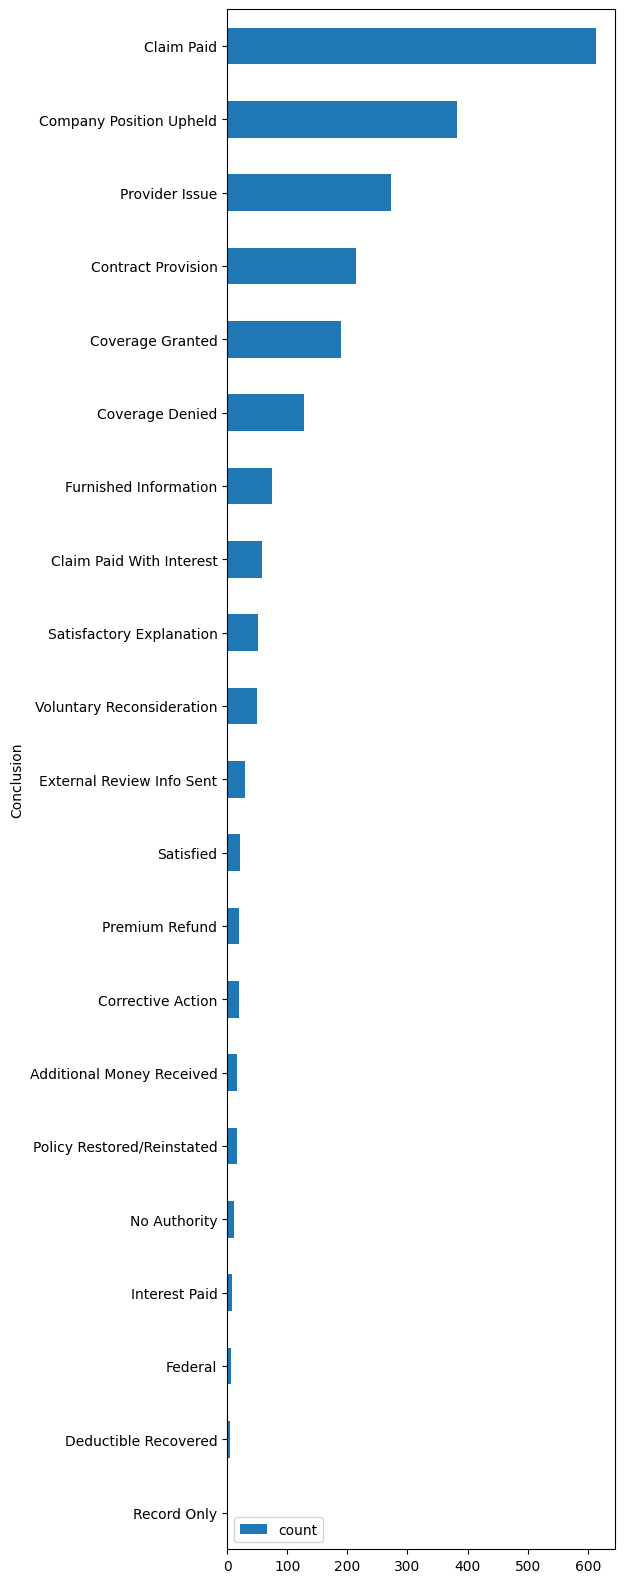

In [12]:
# quantisation of various conclusion that Anthem Health Plans, Inc has reached 

satisfaction.sort_values(ascending=True).plot(kind='barh',figsize=(5,20),legend=True)

In [13]:
# convert the opened and closed date to datetime format 
dataframe['Opened']=pd.to_datetime(dataframe['Opened'])
dataframe['Closed']=pd.to_datetime(dataframe['Closed'])


In [14]:
dataframe.describe()

,File No.,Opened,Closed,Recovery
count,9.191000e+03,9191,9191,9191.000000
mean,7.045779e+06,2022-08-06 00:25:04.080078336,2022-09-20 08:01:46.539005696,2269.002373
min,7.000149e+06,2017-11-16 00:00:00,2018-01-02 00:00:00,0.000000
25%,7.043577e+06,2022-03-08 00:00:00,2022-05-06 00:00:00,0.000000
50%,7.048566e+06,2022-10-11 00:00:00,2022-11-28 00:00:00,0.000000
75%,7.051888e+06,2023-02-19 00:00:00,2023-04-10 00:00:00,274.910000
max,7.055852e+06,2023-07-18 00:00:00,2023-07-31 00:00:00,422799.970000
std,1.092743e+04,NaN,NaN,15338.765950


In [15]:
#get all the datatypes in each column 
dataframe.dtypes

time_taken=dataframe['Closed']-dataframe['Opened']
dataframe['Time_taken']=time_taken
dataframe.head(10)

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status,Time_taken
0,"Anthem Health Plans, Inc",7045593,2022-05-31,2022-06-02,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed,2 days
1,"Anthem Health Plans, Inc",7043381,2022-02-28,2022-06-02,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed,94 days
2,"Anthem Health Plans, Inc",7044860,2022-05-03,2022-06-02,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed,30 days
3,"Anthem Health Plans, Inc",7043381,2022-02-28,2022-06-02,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed,94 days
4,"Anthem Health Plans, Inc",7052007,2023-02-23,2023-03-17,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed,22 days
6,"Anthem Health Plans, Inc",7044860,2022-05-03,2022-06-02,A & H,A & H,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed,30 days
11,UnitedHealthcare Insurance Company,7052741,2023-03-17,2023-05-02,A & H,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Provider Issue,1550.78,Closed,46 days
12,"Anthem Health Plans, Inc",7044266,2022-04-07,2022-06-02,A & H,Health Exchange,Claim Handling,Surprise Billing,Claim Settled,Furnished Information,0.00,Closed,56 days
13,Western World Insurance Company,7042656,2022-02-03,2022-06-02,Commercial Multi-Peril,Fire - Real Property,Claim Handling,Claim Delays,Claim Settled,Corrective Action,311596.73,Closed,119 days
16,"Anthem Health Plans, Inc",7044266,2022-04-07,2022-06-02,A & H,Health Only,Claim Handling,Surprise Billing,Claim Settled,Furnished Information,0.00,Closed,56 days


In [16]:
Time_take_Date=dataframe[['Company','Reason','Disposition','Conclusion','Time_taken','Recovery']]
Time_take_Date.sort_values(by='Time_taken',ascending=True)
#change time taken to number of days in integer datatype
# #explain this line 
Time_take_Date=Time_take_Date[Time_take_Date['Company']=='Anthem Health Plans, Inc']
Time_take_Date=Time_take_Date.groupby(['Reason'])['Time_taken'].mean().dt.days

print(Time_take_Date)



Reason
Claim Handling          48
Marketing & Sales       96
PolicyHolder Service    38
Underwriting            53
Name: Time_taken, dtype: int64


In [17]:
#create a complex graph showing the relationship between time taken and recovery amount usind seaborn library
import seaborn as sns
Time_take_Date

Reason
Claim Handling          48
Marketing & Sales       96
PolicyHolder Service    38
Underwriting            53
Name: Time_taken, dtype: int64